# HW1 - Classification models in sklearn

You'll be building a few classifier models and using some of the tech tools we learned about in Modules 1 and 2. 

## The Raw Data

The data is the the KC housing data. **I've made all the necessary data files available to you
in the assignment folder.**

Kaggle source: https://www.kaggle.com/harlfoxem/housesalesprediction

Basic data dictionary

https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/

Link to discussion item meaning of CONDITION and GRADE fields:

https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/141767





## Preliminary Data Prep
In order to use this data for a classification problem, I did some data prep work. Our target variable is a new variable that I created called `price_gt_1M` which is a binary variable:

* 1 - house price is greater than or equal to 1 million dollars
* 0 - house price is less than a million dollars

The data for this classification problem can be found in `./data/kc_house_data_classification.csv`.

If you want to see my data prep code, see the `hw1_sklearn_dataprep.ipynb` notebook.

## The Problem

Our overall goal is to build classifier models to predict `price_gt_1M` using the the other variables. You must use sklearn Pipelines that contain your preprocessing steps and your model estimation step. We did this in the class notes.

You should do your work in a Jupyter Notebook.

### Task 1 - Folder structure

Start by creating a new project folder structure with the `cookiecutter-datascience-simple` template that I covered in Module 1. Put the data files into an appropriate folder and put this notebook in the main project folder. Any additional notebooks and/or Python files you end up creating should go in the main project folder. 

### Task 2 - Version control

Put your new project folder under version control using git. You should **NOT** track the data file. You must track all notebooks, Python scripts or additional text files you end up creating. Put appropriate information into your readme file.

### Task 3 - EDA

I suggest you start by reading the csv file into a pandas dataframe. I called my dataframe, `housing_df`.
Then start with some basic EDA. You can certainly use automated tools such as pandas-profiling, skimpy or SweetViz as I showed in the class notes. Remember, when you run some of those tools, you **must** have your notebook open in the classic Jupyter Notebook interface (and **NOT** in Jupyter Lab) Check their docs to see if Jupyter Lab is supported yet. I pip installed SweetViz and it seems to be working fine now with Jupyter Lab. As we've seen, the reports get created as HTML documents. These should go in your output folder within your project.

#### Adding magic command for auto-reloading packages in jupyter notebook

In [1]:
%load_ext autoreload
%autoreload 2

#### Importing libraries that we'll be using and adding additional magic command for showing plots in the notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [3]:
# For showing plots in jupyter lab
%matplotlib inline

#### Reading data file and creating sweetviz report from it

In [4]:
housing_class_df = pd.read_csv("./data/kc_house_data_classification.csv")
housing_class_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0


In [5]:
housing_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [6]:
housing_class_df_report = sweetviz.analyze(housing_class_df)

                                             |                                                                …

In [7]:
housing_class_df_report.show_html("./output/housing_class_df_sweetviz_report.html")

Report ./output/housing_class_df_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Task 4 - Categorize feature types

As we did in the Pump it Up class notes, we are going to need to create a list of categorical variables and a list of numeric variables so that we
can apply the appropriate pre-processing to each. In the notes we used the data type of the columns to create lists of numeric and categorical variables. That's not necessarily going to work here as all the variables will come in as numeric. So, you'll have to come up with another way to create lists of the categorical variables and the numeric variables. 

Since we are using regularization, all of the numeric variables will need to rescaled using the `StandardScaler`. You'll do this later as part of the `Pipeline`. For any variables that you decide should be treated as categorical in your models, use the `OneHotEncoder` on them in the preprocessing stage.

Be careful, just because a variable has a numeric datatype in the pandas dataframe, it does **not** mean that it's necessarily a numeric variable in the context of the classification models. Think about each column and look at your EDA reports and decide whether or not it's truly numeric or needs to be treated as categorical data in the models.  

Even though our target variable, `price_gt_1M`, is categorical, you do **NOT** need to do any preprocessing on it. As I mentioned in our class notes, scikit-learn will automatically detect that and will do any encoding needed on its own.

Finally, you'll partition the dataset into training and test datasets for modeling: 

* I broke up the `housing_df` into two separate dataframes that I called `X` and `y`, to use in the models. Here's my code for that:

```
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]
```

* Please use the following code for your data partitioning so that we all end up with the same training and test split:

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)
```

#### Choosing categorical feature types

The following features/columns will be classified as categorical data:
- waterfront
- view
- condition
- grade
- zipcode

`waterfront` takes on binary values indicating if the property has a waterfront (1) or not (0). 

`view` is an index of how good the view of the property is, from 0 to 4. This can be considered discrete numerical as well but the subjective nature of how good it is makes me want to classify it as categorical for now. <br>

`condition` describes the condition of the house, ranked from 1 to 5.

`grade` is defined as 'classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value.' 

`zipcode` is self-explanatory and describes general location so I don't count it as numerical data. 

**Note:** The Sweetviz report had the following as categorical variables:
- floors
- waterfront
- view
- condition
- price_gt_1M

As you can see there's some overlap but it's not a 1:1 agreement; I have chosen `grade` and `zipcode`, Sweetviz has chosen `view` and `price_gt_1M`, and the rest are the same.

In [8]:
# Checking the columns out and converting them to a list
cols_to_keep = housing_class_df.columns.to_list()
cols_to_keep

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_gt_1M']

In [9]:
# creating a list of the categorical variables we want
categorical_cols = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
categorical_cols

['waterfront', 'view', 'condition', 'grade', 'zipcode']

#### Choosing numerical feature types

The rest of the fields not classified sa categorical will be classified as numerical. The list is comprised of:
- price
- bedrooms
- bathrooms
- sqft_liv
- sqft_lot
- floors
- sqft_above
- sqft_basmt
- yr_built
- yr_renov
- lat
- long
- squft_liv15
- squft_lot15

`squft_liv15` is defined as the average size of interior housing living space for the closest 15 houses, in square feet.

`squft_lot15` is defined as the average size of land lots for the closest 15 houses, in square feet.

`lat` stands for latitude while `long` stands for longitude; these are geographical features but since they are continuous and numerical I will consider them numerical.

The rest are self-explanatory.

In [10]:
# taking everything that's not categorical and dropping target variable `price_gt_1M`
numerical_cols = [col for col in cols_to_keep if col not in categorical_cols and col != 'price_gt_1M']
numerical_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

#### Choosing target variable

This one is given to us.

In [11]:
# use iloc to get at all rows of the 18th column (`price_gt_1M`)
y = housing_class_df.iloc[:,18]
y

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: price_gt_1M, Length: 21613, dtype: int64

### Task 5 - Logistic regression models

You are going to build a few different logistic regression models using all of the variables in our housing dataset. For each of these models you will:

- Create a pipeline to do the preprocessing (the scaling and encoding) and the modeling (we did this in the Pump it Up project)
- I'll be giving you different specifications and hyperparameter parameter settings to try
- You'll be scoring the models on overall accuracy for both the training and test data. Discuss any evidence of overfitting or underfitting as well as how the model does in comparison to the null model.
- There will be some additional tasks/questions for each model - details below

**IMPORTANT** You always should put summary comments in one or more markdown cells. Do **NOT** write them as comments in a code cell. The whole point of Jupyter notebooks is to be able to mix markdown cells with code cells. Yes, you should also include code comments but those are different than analysis comments.

#### Creating ColumnTransformer step for pipeline

Creating OneHotEncoder object for getting categorical variables ready to be used in models

In [12]:
# Create a OneHotEncoder object to use on our categorical variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

Creating StandardScaler object for scaling numerical variables so that the values are ready to be used in models

In [13]:
# Create a StandardScalar object to use on our numeric variables
numeric_transformer = StandardScaler()

Creating the "preprocessor" with our categorical and numerical transformers

In [14]:
# Creating a ColumnTransformer object for our pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numerical_cols)
    ])

**Note** we are instantiating the ColumnTransformer object by passing in a `transformers` argument/parameter... here is the information on what that argument entails (from https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html):

`transformers: list of tuples` <br>
 `List of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.`

#### Splitting data into test and train

In [15]:
# features set
X = housing_class_df.iloc[:, 0:18]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [16]:
# target variable set
y = housing_class_df.iloc[:, 18]
y

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: price_gt_1M, Length: 21613, dtype: int64

In [17]:
# using sklearn.model_selection library's train_test_split function to create training data and testing data for X and y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

In [18]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13067,3,2.25,1670,7881,1.0,0,0,4,7,1190,480,1977,0,98031,47.4105,-122.180,1870,7820
17417,5,2.75,3100,5298,2.0,0,0,3,7,3100,0,2007,0,98065,47.5369,-121.887,2440,5250
1290,3,2.25,2470,10290,2.0,0,0,3,8,2230,240,1984,0,98058,47.4459,-122.124,1970,10150
13137,3,1.75,2610,117176,1.0,0,0,3,7,1390,1220,1981,0,98022,47.2585,-121.925,2140,142005
15815,3,1.75,1400,18002,1.0,0,0,3,6,1400,0,1977,0,98019,47.7250,-121.967,2240,14068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13704,3,1.75,2200,7200,1.0,0,0,3,8,1270,930,1962,0,98032,47.3745,-122.276,1800,8000
16144,4,2.50,2980,5896,2.0,0,0,3,8,2980,0,2001,0,98053,47.6872,-122.036,2900,5712
8586,3,2.00,2420,17859,1.0,0,1,5,9,1500,920,1979,0,98034,47.7074,-122.246,2955,17859
4014,3,1.75,2160,6272,1.0,0,0,4,8,1390,770,1960,0,98115,47.6777,-122.306,1290,5376


In [19]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
9626,3,1.00,980,9682,1.0,0,0,3,7,980,0,1969,0,98031,47.4136,-122.207,1580,9682
21376,3,2.25,1310,915,2.0,0,0,3,7,1060,250,2007,0,98144,47.5738,-122.293,1500,1215
9036,3,2.75,2216,31215,1.0,0,0,3,9,2216,0,1968,2005,98092,47.3164,-122.199,2216,30048
1007,4,2.50,2610,7091,2.0,0,0,3,9,2610,0,1987,0,98023,47.3017,-122.349,2610,7773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,3,2.50,1640,5097,2.0,0,0,3,7,1640,0,1969,0,98155,47.7522,-122.278,1880,6000
16297,4,2.25,2330,7020,1.0,0,0,4,8,1450,880,1973,0,98006,47.5620,-122.139,2330,8500
1390,4,2.50,2740,7140,2.0,0,0,3,8,2740,0,1993,0,98074,47.6334,-122.021,2260,7035
3546,3,2.25,2120,6710,1.0,0,0,5,7,1420,700,1959,0,98155,47.7461,-122.324,1880,6960


In [20]:
y_train

13067    0
17417    0
1290     0
13137    0
15815    0
        ..
13704    0
16144    0
8586     0
4014     0
21398    0
Name: price_gt_1M, Length: 17290, dtype: int64

In [21]:
y_test

13473    0
9626     0
21376    0
9036     0
1007     0
        ..
662      0
16297    0
1390     0
3546     0
18167    0
Name: price_gt_1M, Length: 4323, dtype: int64

#### Model 0: The null model

We always start with the simplest possible model and we call it the *null model*. For binary classification models, the null model is usually just to predict that each observation will fall into whichever class is most prevalent. In other words, what would be the performance of a model in which we just predict 0 for everyone? There's no need to fit a model, just compute the accuracy for train and test if everyone was classified as 0.

In [22]:
# using 0 as the prediction for this binary target variable's null model since it's more prevalent (more houses that are less than $1m than otherwise in this dataset... and in general)
# checking if the elements in the array are 0 which will return a True (1) or a False (0) and then taking the average of that to determine accuracy of the null model
(y_train == 0).mean()

0.9327356853672644

In [23]:
# predicting the test data now
(y_test == 0).mean()

0.9238954429794124

These scores are very high. This shows us that the vast majority of houses are under 1m. There's not much of a difference between the training and test data either suggesting we have a good split and/or good sampling and/or enough data. Funny enough, the null model is a little less accurate on the test data which is what you would expect and want with a real model.

#### Model 1: Ridge regression with C=1.0

Build a ridge regression model to predict `price_gt_1M` and use the default value of `C=1.0`. I used the following additional options with the `LogisticRegression` model - `solver='saga', max_iter=2000`. Feel free to change these if you want. AFter fitting the model, compute its accuracy score for training and test and write out a little summary (f-strings are useful). Here's an example:

    Training score: 0.974
    Test score: 0.971

Create confusion matrices for both training and test.

Also, create a plot of the coefficients (as we did in the notes). If you want to use that `coef_plot` function we used in the notes, you'll have
to make a few modifications because we only have one set of coefficients (since we have a binary classification problem as opposed to a 3-class problem in Pump it Up).

##### Creating the model

In [24]:
# creating our logistic regression model with these parameters
# l2 = ridge... it's the cost function that is "squared" (think l2... ^2)... l2 is the default argument for LogisticRegression class in sklearn
# C = Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. C=1.0 is default
log_model_ridge_c1 = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=2000)
log_model_ridge_c1

LogisticRegression(max_iter=2000, solver='saga')

##### Adding the model to the pipeline

In [25]:
# creating the pipeline with our ridge regression model (penalty='l2', C=1.0)
pipeline_log_model_ridge_c1 = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('classifier', log_model_ridge_c1)])

In [26]:
pipeline_log_model_ridge_c1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'zipcode']),
                                                 ('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15'])])),
      

In [27]:
# taking a peak at how it looks
from sklearn import set_config

set_config(display='diagram')
pipeline_log_model_ridge_c1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'zipcode']),
                                                 ('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15'])])),
                ('classifier',
                 LogisticRegression(max_iter=2000, solver='saga'))])

##### Fitting and scoring the model

In [28]:
# we can now fit the model and score the accuracy of the training and test data
pipeline_log_model_ridge_c1.fit(X_train, y_train)

print(f"Training score for ridge logistic regression (max_iter=2000, solver='saga', C=1.0): {pipeline_log_model_ridge_c1.score(X_train, y_train):.3f}")
print(f"Test score for ridge logistic regression (max_iter=2000, solver='saga', C=1.0): {pipeline_log_model_ridge_c1.score(X_test, y_test):.3f}")

Training score for ridge logistic regression (max_iter=2000, solver='saga'): 0.974
Test score for ridge logistic regression (max_iter=2000, solver='saga'): 0.971


These are very high scores. 97.4% on the training data and 97.1% accuracy on the test data. This beats the null model's score of 93.3% and 92.4%, respectively, so that's good. 

There isn't any evidence of underfitting or overfitting as the test score is a very tiny amount lower than the training score which is what we want. The scores are extremely close to each other, similar to the null model, but they're still more higher and thus more accurate.

##### Confusion matrix

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [112]:
# creating a function for creating a confusion matrix
def conf_matrix(pipeline_model, dataset_type, X_data, y_data):
    
    titles_options = [(f"Confusion matrix for {dataset_type}, without normalization", None),
                      (f"Normalized confusion matrix for {dataset_type}", 'true')]

    class_names = pipeline_model['classifier'].classes_

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(pipeline_model, X=X_data, y_true=y_data,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[15984   143]
 [  314   849]]
Normalized confusion matrix for train
[[0.99113288 0.00886712]
 [0.2699914  0.7300086 ]]


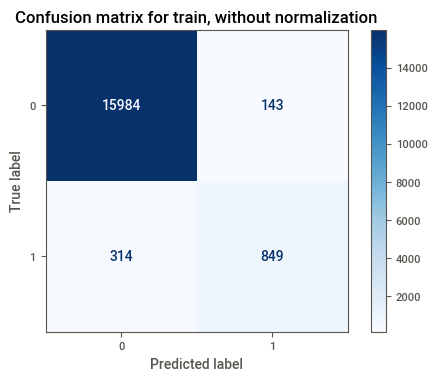

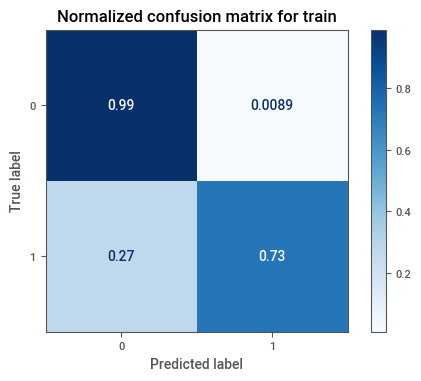

In [113]:
# call the confusion matrix for the logistic regression pipeline using l2 penalty and c = 1.0
conf_matrix(pipeline_log_model_ridge_c1, 'train', X_train, y_train)

Confusion matrix for test, without normalization
[[3961   33]
 [  94  235]]
Normalized confusion matrix for test
[[0.99173761 0.00826239]
 [0.28571429 0.71428571]]


D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


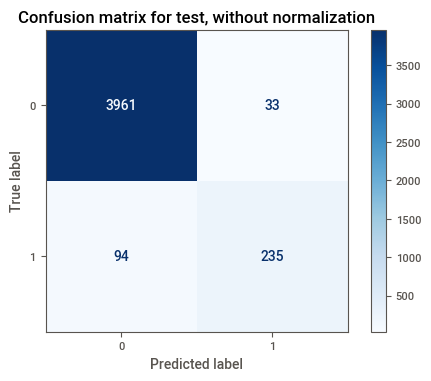

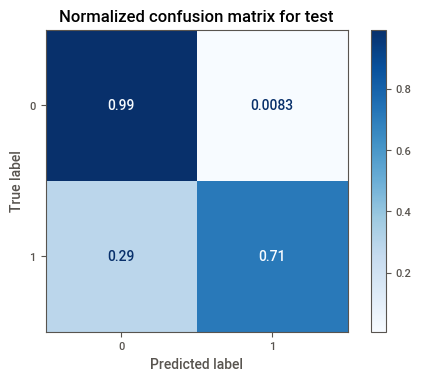

In [114]:
conf_matrix(pipeline_log_model_ridge_c1, 'test', X_test, y_test)

Not bad. Looks like the model struggles with misclassifying houses over 1m as being not over 1m more than the other way around (i.e. type II errors, false negatives, are more common than type I errors, false positives, with this model).

##### Plotting the coefficients

In [39]:
# create our coefficient plot function
def coef_plot(model, title=None):    
    if title:
        plt.title(title)
        
    plt.plot(model.steps[1][1].coef_[0])

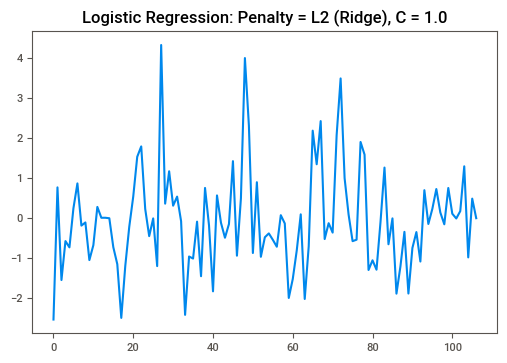

In [72]:
coef_plot(pipeline_log_model_ridge_c1, 'Logistic Regression: Penalty = L2 (Ridge), C = 1.0')

Not sure what the difference is between using model...coef and model...coef[0] when plotting but the latter seems to work while the former doesn't. Looks like there's a numpy array within a numpy array. This makes sense since I think about the sklearn notes and how it had multiple lists that had to be looped over

In [54]:
print(type(pipeline_log_model_ridge_c1.steps[1][1].coef_[0]))
print(type(pipeline_log_model_ridge_c1.steps[1][1].coef_))
print((pipeline_log_model_ridge_c1.steps[1][1].coef_[0]).shape)
print((pipeline_log_model_ridge_c1.steps[1][1].coef_).shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(107,)
(1, 107)


In [50]:
pipeline_log_model_ridge_c1.steps[1][1].coef_[0]

array([-2.54769303e+00,  7.60232182e-01, -1.55864344e+00, -5.83978772e-01,
       -7.40926896e-01,  2.36511018e-01,  8.59577243e-01, -1.96670805e-01,
       -1.17336871e-01, -1.05972194e+00, -6.85270297e-01,  2.71539066e-01,
       -8.64192766e-05, -6.95687954e-05, -1.20998448e-02, -7.36055388e-01,
       -1.16147025e+00, -2.50618263e+00, -1.20888901e+00, -2.26435366e-01,
        5.31159408e-01,  1.52632025e+00,  1.78574796e+00,  2.20600011e-01,
       -4.60381838e-01, -1.66864728e-02, -1.21000615e+00,  4.32359335e+00,
        3.52955914e-01,  1.16325485e+00,  3.02050347e-01,  5.29108105e-01,
       -8.76297603e-02, -2.43025743e+00, -9.70251736e-01, -1.02077627e+00,
       -9.73431697e-02, -1.46298943e+00,  7.46187420e-01, -1.91749556e-01,
       -1.84161782e+00,  5.58917366e-01, -1.26322347e-01, -5.00043838e-01,
       -1.57014165e-01,  1.41687209e+00, -9.49488505e-01,  4.89088747e-01,
        3.99703715e+00,  2.30584601e+00, -8.82319419e-01,  8.89387796e-01,
       -9.76846996e-01, -

In [51]:
pipeline_log_model_ridge_c1.steps[1][1].coef_

array([[-2.54769303e+00,  7.60232182e-01, -1.55864344e+00,
        -5.83978772e-01, -7.40926896e-01,  2.36511018e-01,
         8.59577243e-01, -1.96670805e-01, -1.17336871e-01,
        -1.05972194e+00, -6.85270297e-01,  2.71539066e-01,
        -8.64192766e-05, -6.95687954e-05, -1.20998448e-02,
        -7.36055388e-01, -1.16147025e+00, -2.50618263e+00,
        -1.20888901e+00, -2.26435366e-01,  5.31159408e-01,
         1.52632025e+00,  1.78574796e+00,  2.20600011e-01,
        -4.60381838e-01, -1.66864728e-02, -1.21000615e+00,
         4.32359335e+00,  3.52955914e-01,  1.16325485e+00,
         3.02050347e-01,  5.29108105e-01, -8.76297603e-02,
        -2.43025743e+00, -9.70251736e-01, -1.02077627e+00,
        -9.73431697e-02, -1.46298943e+00,  7.46187420e-01,
        -1.91749556e-01, -1.84161782e+00,  5.58917366e-01,
        -1.26322347e-01, -5.00043838e-01, -1.57014165e-01,
         1.41687209e+00, -9.49488505e-01,  4.89088747e-01,
         3.99703715e+00,  2.30584601e+00, -8.82319419e-0

#### Model 2: Lasso regression with C=1.0

Same as Model 1, but use lasso regression instead of ridge regression. Create the same outputs and compare the performance to the ridge regression model.

##### Creating the model and pipeline, fitting on the test data, and scoring the train and test data

In [71]:
# create the logistic regression model
log_model_lasso_c1 = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000)

# create the pipeline
pipeline_log_model_lasso_c1 = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('classifier', log_model_lasso_c1)])

# fit the model on training data
pipeline_log_model_lasso_c1.fit(X_train, y_train)

# predict and print the score on training and test data
print(f"Training score for lasso logistic regression (max_iter=2000, solver='saga', C=1.0): {pipeline_log_model_lasso_c1.score(X_train, y_train):.3f}")
print(f"Test score for lasso logistic regression (max_iter=2000, solver='saga', C=1.0): {pipeline_log_model_lasso_c1.score(X_test, y_test):.3f}")

Training score for lasso logistic regression (max_iter=2000, solver='saga'): 0.974
Test score for lasso logistic regression (max_iter=2000, solver='saga'): 0.970


We barely see a difference between using Ridge as the cost function vs using Lasso as the cost function. The scores are nearly identical... with only the test score being .1% lower for lasso.

##### Confusion matrix

D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[15977   150]
 [  296   867]]
Normalized confusion matrix for train
[[0.99069883 0.00930117]
 [0.25451419 0.74548581]]


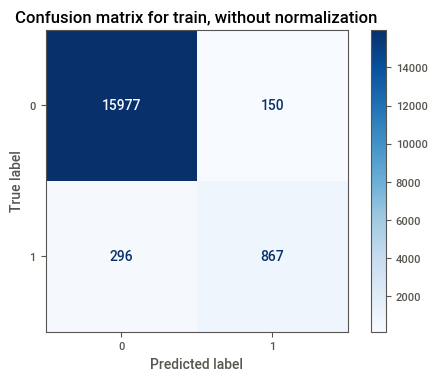

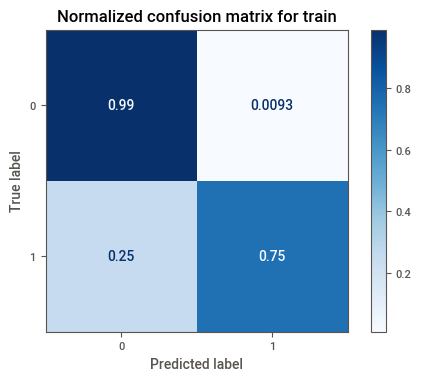

In [115]:
conf_matrix(pipeline_log_model_lasso_c1, 'train', X_train, y_train)

Confusion matrix for test, without normalization
[[3957   37]
 [  92  237]]
Normalized confusion matrix for test
[[0.9907361  0.0092639 ]
 [0.27963526 0.72036474]]


D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


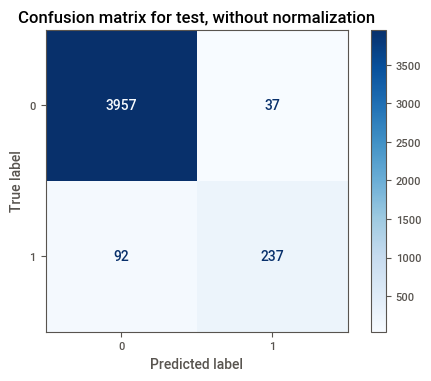

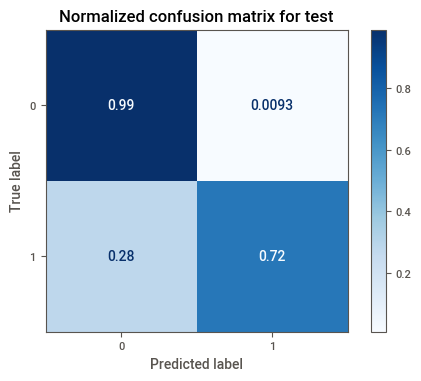

In [116]:
conf_matrix(pipeline_log_model_lasso_c1, 'test', X_test, y_test)

Very similar to the logistic regression model using the ridge cost function.

##### Coefficient plot

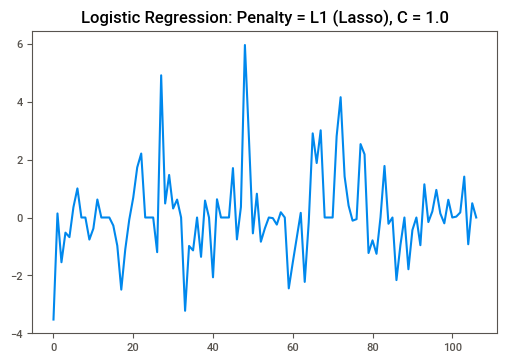

In [73]:
coef_plot(pipeline_log_model_lasso_c1, 'Logistic Regression: Penalty = L1 (Lasso), C = 1.0')

The plot looks very similar to the logistic regression model with ridge cost function, unsurprisingly.

#### Model 3: Lasso regression with C=0.01

Fit another lasso regression but use `C=0.01`. Does this enforce more or less regularization? Create the same outputs and compare the performance to the first two models. Discuss why the plot looks so different than the previous plots.

##### Creating the model and pipeline, fitting on the test data, and scoring the train and test data

In [75]:
pipeline_log_model_lasso_c_optimal should've created a function for this but since there's only a couple of models left I'm okay copying & pasting

# create the logistic regression model
log_model_lasso_c001 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000)

# create the pipeline
pipeline_log_model_lasso_c001 = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('classifier', log_model_lasso_c001)])

# fit the model on training data
pipeline_log_model_lasso_c001.fit(X_train, y_train)

# predict and print the score on training and test data
print(f"Training score for lasso logistic regression (max_iter=2000, solver='saga', C=0.01): {pipeline_log_model_lasso_c001.score(X_train, y_train):.3f}")
print(f"Test score for lasso logistic regression (max_iter=2000, solver='saga', C=0.01): {pipeline_log_model_lasso_c001.score(X_test, y_test):.3f}")

Training score for lasso logistic regression (max_iter=2000, solver='saga'): 0.954
Test score for lasso logistic regression (max_iter=2000, solver='saga'): 0.950


D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Interesting... we see a drop-off in the accuracy in this model by about 2 whole percentage points, from ~97% to ~95%.

##### Confusion matrix

D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[16001   126]
 [  672   491]]
Normalized confusion matrix for train
[[0.99218702 0.00781298]
 [0.57781599 0.42218401]]


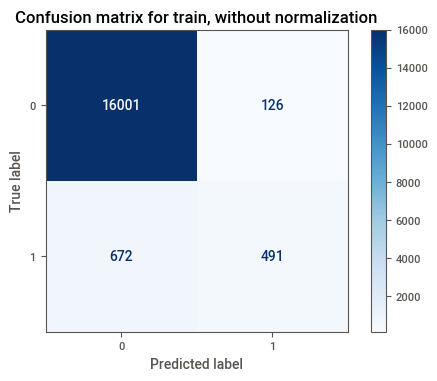

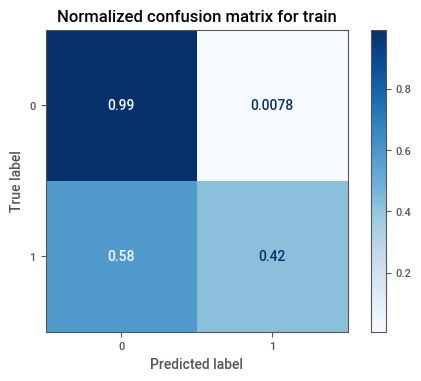

In [117]:
conf_matrix(pipeline_log_model_lasso_c001, 'train', X_train, y_train)

Confusion matrix for test, without normalization
[[3964   30]
 [ 186  143]]
Normalized confusion matrix for test
[[0.99248873 0.00751127]
 [0.56534954 0.43465046]]


D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


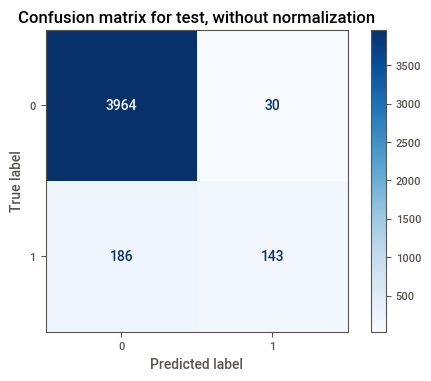

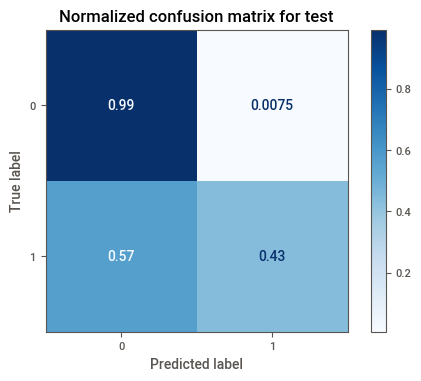

In [118]:
conf_matrix(pipeline_log_model_lasso_c001, 'test', X_test, y_test)

This logistic regression model (using l2 cost function/penalty aka lasso) with a C value of 0.01 is even more prone to type II errors (false negatives) than the two logistic regression models before it.

##### Coefficient plot

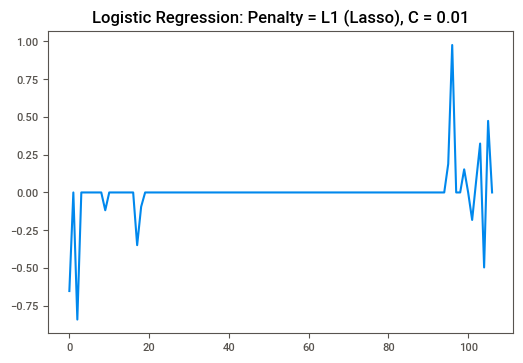

In [77]:
coef_plot(pipeline_log_model_lasso_c001, 'Logistic Regression: Penalty = L1 (Lasso), C = 0.01')

The coefficient plot looks very different than the coefficient plot for the two logisitic models from before. This makes sense since we chose a C value of 0.01 which enforces way more regularization which essentially brings a lot of coefficients to 0... this can be useful for feature selection I believe.

As stated before (taken from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html): <br>
**C = Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.**

#### Model 4: Lasso regression with optimal C value

Now use `LogisticRegressionCV` to fit a model and let sklearn determine the optimal `C` value to use. Again, compute score and confusion matrices. Also, print out the optimal value of `C`. Does regularization help for this problem?

##### Creating the model and pipeline, fitting on the test data, and scoring the train and test data

In [79]:
# same thing as before... again... just kidding, we're using LogisticRegressionCV this time

# create the logistic regression model
log_model_lasso_c_optimal = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=2000)

# create the pipeline
pipeline_log_model_lasso_c_optimal = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('classifier', log_model_lasso_c_optimal)])

# fit the model on training data
pipeline_log_model_lasso_c_optimal.fit(X_train, y_train)

# predict and print the score on training and test data
print(f"Training score for lasso logistic regression (max_iter=2000, solver='saga', C=optimal): {pipeline_log_model_lasso_c_optimal.score(X_train, y_train):.3f}")
print(f"Test score for lasso logistic regression (max_iter=2000, solver='saga', C=optimal): {pipeline_log_model_lasso_c_optimal.score(X_test, y_test):.3f}")

Training score for lasso logistic regression (max_iter=2000, solver='saga'): 0.975
Test score for lasso logistic regression (max_iter=2000, solver='saga'): 0.971


The score for training and test data are nearly identical to the logistic regression (both Ridge and Lasso) model with a C value of 1.0. 

The training score is only 0.1% higher than our previous highest scoring logistic regression model (ridge & lasso regression, C=1.0) while the test score remains the same as the highest previous scoring model (ridge regression, C=1.0).

Let's see what the optimal C value is.

In [102]:
# getting at the model inside the pipeline and outputting the C values that were used for cross-validation
pipeline_log_model_lasso_c_optimal.steps[1][1].Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [103]:
# see which C value was optimal
pipeline_log_model_lasso_c_optimal.steps[1][1].C_

array([166.81005372])

Looks like the optimal C value is 166.81 which means that regularization does not matter much at all for this problem since it's a high value. There's not a whole lot of improvement left to be had anyway since the accuracy is 3% off 100% anyway... but I guess that depends on the context (.5% improvement may be a big deal in some instances and not in others... in this one I don't think it would be).

##### Confusion matrix

D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[15970   157]
 [  276   887]]
Normalized confusion matrix for train
[[0.99026477 0.00973523]
 [0.23731728 0.76268272]]


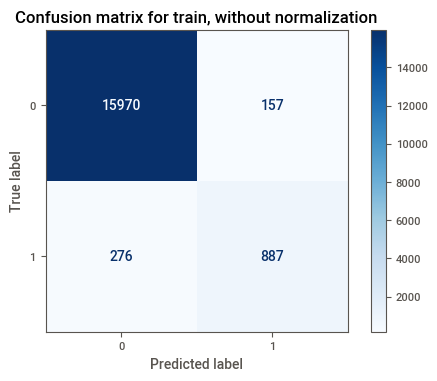

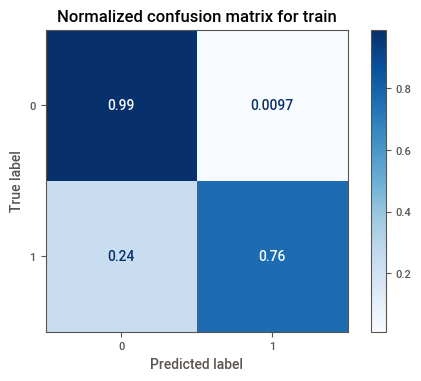

In [119]:
conf_matrix(pipeline_log_model_lasso_c_optimal, 'train', X_train, y_train)

Confusion matrix for test, without normalization
[[3955   39]
 [  86  243]]
Normalized confusion matrix for test
[[0.99023535 0.00976465]
 [0.26139818 0.73860182]]


D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


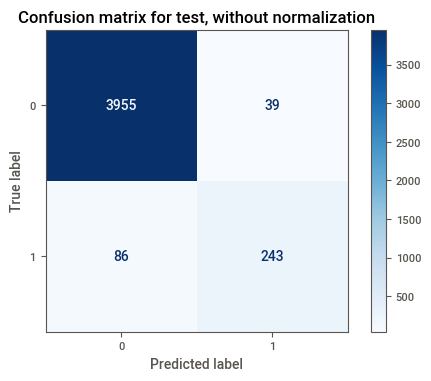

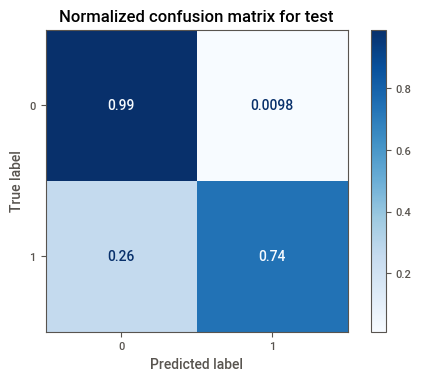

In [120]:
conf_matrix(pipeline_log_model_lasso_c_optimal, 'test', X_test, y_test)

As expected, we see a little higher accuracy on this model than previous ones. The false negatives have ticked down while the true positives have ticked up.

##### Coefficient plot

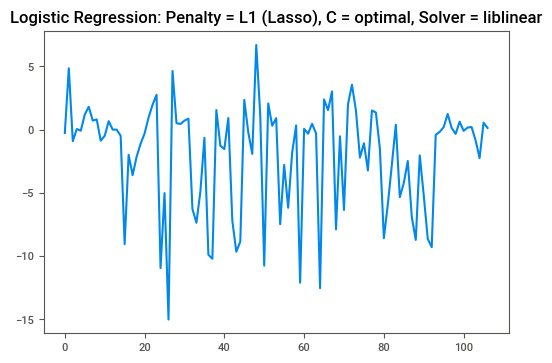

In [107]:
coef_plot(pipeline_log_model_lasso_c_optimal, 'Logistic Regression: Penalty = L1 (Lasso), C = optimal, Solver = liblinear')

Looks like a pretty hectic coefficient plot. The magnitudes of the coefficients are definitely higher since there's barely any regularization.

### Task 6 - Random forest model
Now fit a random forest model to predict `price_gt_1M`. As we did above, for both train and test, compute the accuracy score, create a confusion matrix, and discuss the performance relative to your logistic regression models. Obviously you do not need to create a coefficient plot (why not?).

##### Importing the library needed

In [109]:
from sklearn.ensemble import RandomForestClassifier

##### Creating the model and pipeline, fitting on the test data, and scoring the train and test data

In [110]:
# similar to before except we create a RandomForest object this time
rf_model = RandomForestClassifier(oob_score=True, random_state=0)

# Append random forest classifier to preprocessing pipeline
pipeline_rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf_model)])


# fit the model on training data
pipeline_rf_model.fit(X_train, y_train)

print(f"Training score for random forest (oob_score=True, random_state=0): {pipeline_rf_model.score(X_train, y_train):.3f}")
print(f"Test score for random forest (oob_score=True, random_state=0): {pipeline_rf_model.score(X_test, y_test):.3f}")

Training score for random forest (oob_score=True, random_state=0): 1.000
Test score for random forest (oob_score=True, random_state=0): 0.971


Interestingly enough, even though the data looks overfitted (100% accuracy on training data!), it can be argued that it's not since the model had a 97.1% accuracy on the test data, on par with our best logistic regression model. It may still be more desirable to go with logistic regression in this case just because of the possibility of overfitting... you want to minimize the discrepancy between the score for the training and test data set (what would be the optimal difference anyway...?). But then again random forests are supposed to be better for decreasing variance so maybe random forest is the way to go.

##### Confusion matrix

D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[16127     0]
 [    0  1163]]


D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix for train
[[1. 0.]
 [0. 1.]]


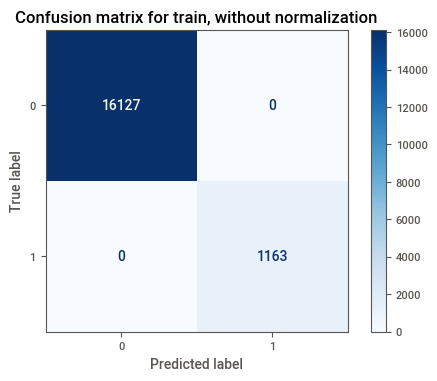

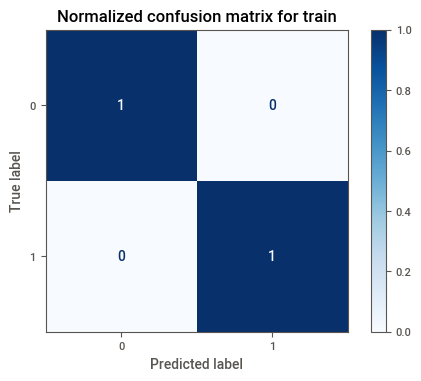

In [121]:
conf_matrix(pipeline_rf_model, 'train', X_train, y_train)

D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Dimas\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3962   32]
 [  93  236]]
Normalized confusion matrix for test
[[0.99198798 0.00801202]
 [0.28267477 0.71732523]]


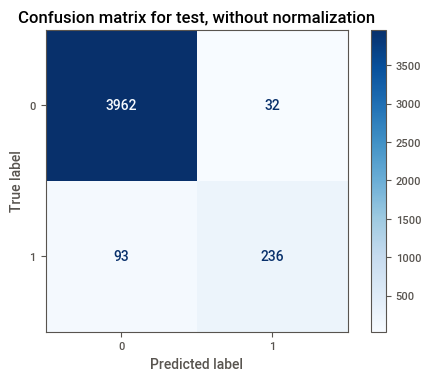

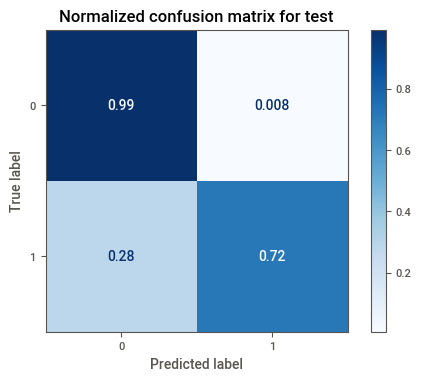

In [122]:
conf_matrix(pipeline_rf_model, 'test', X_test, y_test)

Nothing surprising here. Perfect score for train and high/similar score for the test data set.

##### Absence of a coefficient plot (or is there...?)

Obviously we cannot have a coefficient plot since a random forest classifier is an ensemble model which means it consists of many models or decision trees in this case. The logistic regression is just one model and is relatively simple compared to the random forest containing many models (search the web for bootstrap aggregating for more information on random forests).

One possible thing to do (I think) is to look at the `feature_importances_` attribute of the RandomForest class. This gives us a general overview of the coefficients and their importance, if I'm interpreting it correctly (see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_).

This can be used in lieu of pulling out coefficients from every single decision tree model if that's even possible.

In [166]:
from IPython.display import Image

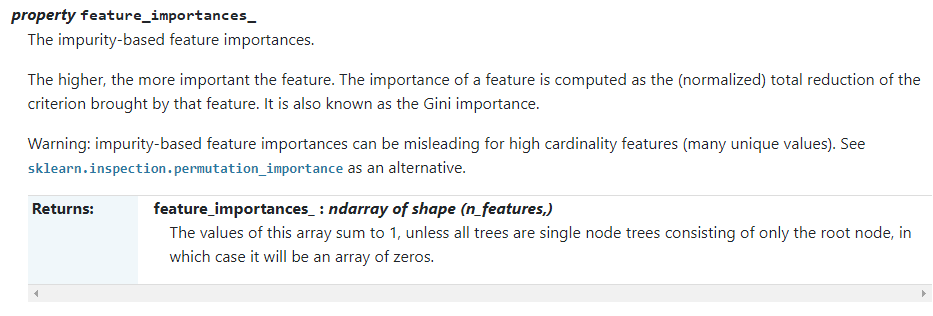

In [170]:
Image('images/feature_importances_.png')

In [163]:
# create our coefficient plot function for a random forest... one slight difference. In the real world this is bad practice, I could've changed the previous function
# by adding an additional parameter but this will do for now
def coef_plot_rf(model, title=None):    
    if title:
        plt.title(title)
        
    plt.plot(model.steps[1][1].feature_importances_)

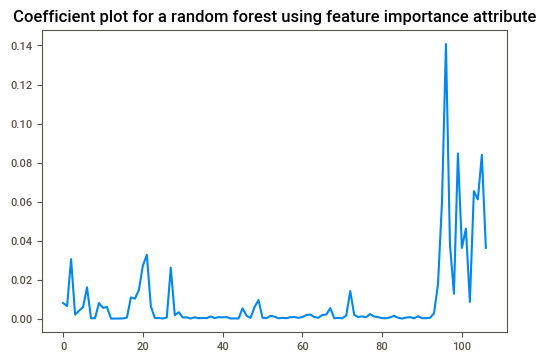

In [164]:
coef_plot_rf(pipeline_rf_model, 'Coefficient plot for a random forest using feature importance attribute')

The plot looks pretty different from all the other plots. In a way, it looks similar to the lasso logistic regression with C = 0.01 (high regularization) because that one had coefficients at the end with higher magnitutdes while the rest were low.

### Task 7 - a little error exploration (more challenging)

This will challenge your pandas and your general data manipulation skills. Just give it your best shot. If you don't get, you don't get it. It doesn't require much code - just the right code. :)

I also include another data file called `kc_house_data_regression.csv` in which the target variable is `price`. Everything else is exactly the same, including the order of the rows. So, here's your challenge. Using Model 2 (the lasso model with `C=1.0`), start by using the `predict` method to generate an array of predictions for the original test data. Obviously, some of the predictions are correct and some of them are not. It would be interesting to know more about the kinds of errors our model is making. We can see some things from the confusion matrix. However, since we don't have the actual `price` value, it's hard to visualize how the errors relate to it. For example, are we only making errors when the price is really close to 1 million? One way to visualize this is to create a histogram of the actual prices **only for those rows in test that we got wrong**. What makes this tricky? A few things:

* As I already mentioned, `price` is not in our original data but is in the `kc_house_data_regression.csv` dataset. Remember, other than the target variable, this dataset is identical (including the index) to the one we used above for classification.
* We partitioned the classification dataset into training and test datasets.
* In order to create the histogram, we simply need a Series (or array) of `price` values corresponding to the predictions in test that we got wrong.

**HINTS** 

* The pandas `join` method will come in handy.
* The pandas `.loc` selector can take a boolean array as an input for selecting rows or columns. Using one to select rows is quite useful for this problem.

##### Reading in the data

In [171]:
# read in our csv for our new dataframe (that's actually the same dataframe - 'price_gt_1M' + 'price')
housing_reg_df = pd.read_csv("./data/kc_house_data_regression.csv")
housing_reg_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


In [172]:
# double checking that our new dataframe is the same as our original dataframe that we imported except for the fact that it has 'price' instead of 'price_gt_1M'
housing_class_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0


looks good.

##### Creating our array of predictions using the logistic regression with C = 1.0 and L1 ("Lasso") penalty

In [307]:
model_two_predictions = pipeline_log_model_lasso_c1.predict(X_test)
model_two_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [308]:
print(f"Type of object: {type(model_two_predictions)}")

Type of object: <class 'numpy.ndarray'>


In [309]:
print(f"Size of numpy.ndarray: {model_two_predictions.size}")

Size of numpy.ndarray: 4323


##### Creating a dataframe from the array of predictions and inner joining it to our full dataframe

In [310]:
preds_df = pd.DataFrame(model_two_predictions, columns = ['prediction'])
preds_df

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
4318,0
4319,0
4320,0
4321,0


In [311]:
# we can leave out the 'on' parameter since we are joining by index and the indexes for both dataframes correspond to the same row
housing_reg_plus_preds_df = housing_reg_df.join(preds_df, how='inner')
housing_reg_plus_preds_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,prediction
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,3,1.00,1290,4000,1.5,0,0,3,7,1290,0,1926,0,98118,47.5462,-122.277,1160,5040,402500.0,0
4319,3,2.50,2390,6435,1.0,0,0,3,8,1600,790,1978,0,98034,47.7260,-122.194,2020,7300,432500.0,0
4320,5,1.75,2460,14100,1.0,0,0,3,7,1380,1080,1972,0,98028,47.7452,-122.224,2028,11078,485000.0,0
4321,4,2.75,2930,22000,1.0,0,3,4,9,1580,1350,1978,0,98023,47.3227,-122.384,2930,9758,560000.0,0


##### Creating a dataframe of all the wrong predictions

In [312]:
wrong_preds_df = housing_reg_plus_preds_df.loc[(housing_reg_plus_preds_df['price'] >= 1000000) & (housing_reg_plus_preds_df['prediction'] == 0)
                             | (housing_reg_plus_preds_df['price'] < 1000000) & (housing_reg_plus_preds_df['prediction'] == 1)]

wrong_preds_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,prediction
5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1225000.0,0
21,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000.0,0
23,2,1.50,1070,9643,1.0,0,0,3,7,1070,0,1985,0,98030,47.3533,-122.166,1220,8386,252700.0,1
34,4,2.75,2060,6659,1.0,0,0,3,7,1280,780,1981,0,98058,47.4276,-122.157,2020,8720,322500.0,1
49,3,2.50,2753,65005,1.0,1,2,5,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513,1350000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,3,2.50,2490,24691,1.0,1,4,4,9,1580,910,1961,0,98146,47.4880,-122.364,2800,24121,1155000.0,0
4296,2,1.00,920,5889,1.0,0,0,4,6,920,0,1950,0,98002,47.3012,-122.218,1210,6180,156000.0,1
4298,3,1.50,2540,2700,2.0,0,0,4,8,1630,910,1922,0,98119,47.6370,-122.361,2520,5400,1190000.0,0
4309,2,1.75,2330,7280,1.0,0,0,3,7,1450,880,1982,0,98188,47.4282,-122.280,1830,12178,535000.0,1


(array([232., 196.,  58.,  24.,   5.,   3.,   1.,   3.,   0.,   1.]),
 array([ 130000.,  823250., 1516500., 2209750., 2903000., 3596250.,
        4289500., 4982750., 5676000., 6369250., 7062500.]),
 <BarContainer object of 10 artists>)

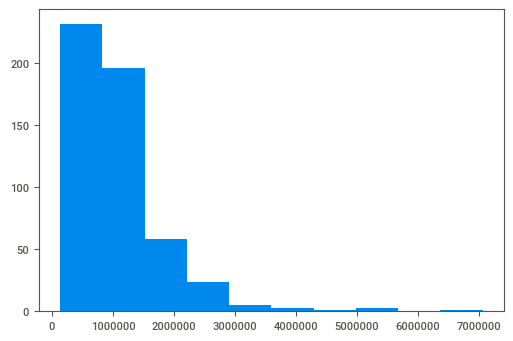

In [313]:
plt.hist(wrong_preds_df['price'])

##### Separating the plots into type I (false positive) and type II (false negative) errors

In [325]:
wrong_preds_df_type1 = housing_reg_plus_preds_df.loc[(housing_reg_plus_preds_df['price'] < 1000000) & (housing_reg_plus_preds_df['prediction'] == 1)]
wrong_preds_df_type1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,prediction
23,2,1.50,1070,9643,1.0,0,0,3,7,1070,0,1985,0,98030,47.3533,-122.166,1220,8386,252700.0,1
34,4,2.75,2060,6659,1.0,0,0,3,7,1280,780,1981,0,98058,47.4276,-122.157,2020,8720,322500.0,1
73,4,2.50,2380,5000,2.0,0,0,3,8,2380,0,2005,0,98038,47.3608,-122.036,2420,5000,360000.0,1
80,3,2.50,2350,5100,2.0,0,0,3,8,2350,0,2003,0,98038,47.3512,-122.008,2350,5363,390000.0,1
84,3,1.00,960,6634,1.0,0,0,3,6,960,0,1952,0,98125,47.7264,-122.310,1570,7203,315000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4283,4,2.50,3050,32450,1.0,0,0,4,8,1550,1500,1983,0,98030,47.3626,-122.209,2350,15390,465000.0,1
4287,3,2.00,1510,7066,1.0,0,2,3,7,1230,280,1973,0,98125,47.7053,-122.303,1950,8089,430000.0,1
4291,2,1.00,1550,7713,1.0,0,0,3,7,1550,0,1930,1979,98117,47.7005,-122.358,1340,6350,599000.0,1
4296,2,1.00,920,5889,1.0,0,0,4,6,920,0,1950,0,98002,47.3012,-122.218,1210,6180,156000.0,1


(array([24., 41., 34., 43., 26., 21., 20., 21., 14.,  9.]),
 array([130000., 215900., 301800., 387700., 473600., 559500., 645400.,
        731300., 817200., 903100., 989000.]),
 <BarContainer object of 10 artists>)

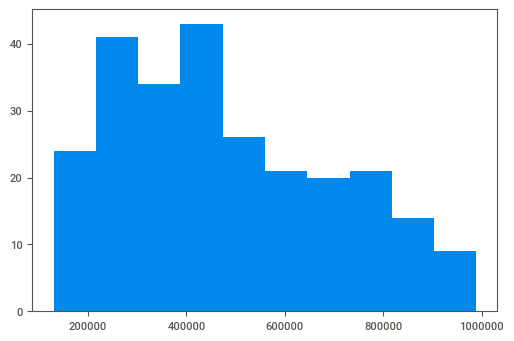

In [319]:
plt.hist(wrong_preds_df_type1['price'])

In [326]:
wrong_preds_df_type2 = housing_reg_plus_preds_df.loc[(housing_reg_plus_preds_df['price'] >= 1000000) & (housing_reg_plus_preds_df['prediction'] == 0)]
wrong_preds_df_type2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,prediction
5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1225000.0,0
21,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000.0,0
49,3,2.50,2753,65005,1.0,1,2,5,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513,1350000.0,0
69,5,2.25,3200,20158,1.0,0,0,3,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158,1325000.0,0
70,5,3.25,4770,50094,1.0,0,0,4,11,3070,1700,1973,0,98005,47.6525,-122.160,3530,38917,1040000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,6,4.50,3902,3880,3.0,0,4,4,9,2782,1120,1977,0,98116,47.5837,-122.399,1100,3870,1300000.0,0
4275,4,2.50,2720,16454,1.0,0,1,5,9,1870,850,1963,0,98040,47.5489,-122.216,3560,15993,1275000.0,0
4295,3,2.50,2490,24691,1.0,1,4,4,9,1580,910,1961,0,98146,47.4880,-122.364,2800,24121,1155000.0,0
4298,3,1.50,2540,2700,2.0,0,0,4,8,1630,910,1922,0,98119,47.6370,-122.361,2520,5400,1190000.0,0


Initially confused at the near 50/50 split between type I and type II errors when the same was not true when running the model on the train and test data. There's actually only a bit more type II errors (270) than type I (252) whereas the accuracy for the same model (logistic regression, l1 penalty, c = 1.0) had way more type II errors (false negatives).

Not 100% sure what this means... sampling isn't as great as I thought? I did something wrong? Not sure.

(array([194.,  39.,  21.,   8.,   3.,   1.,   1.,   2.,   0.,   1.]),
 array([1000000., 1606250., 2212500., 2818750., 3425000., 4031250.,
        4637500., 5243750., 5850000., 6456250., 7062500.]),
 <BarContainer object of 10 artists>)

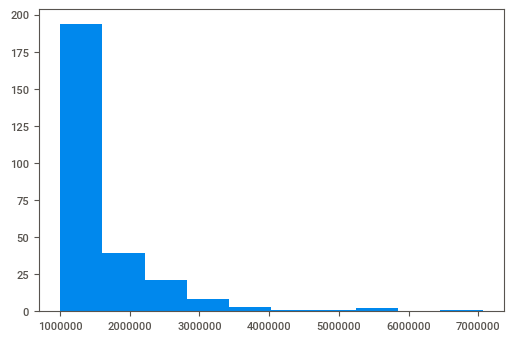

In [328]:
plt.hist(wrong_preds_df_type2['price'])

##### Summary/Conclusions

Type I errors (false positives) seem to be all over the place. There's a slight right tail. It's interesting that many of the false positives are houses with values well below 1m. Just by eyeballing it, it looks like more than half othe false positives have a house price of less than half of 1m.

Type II errors (false negatives) have a more pronounced right tail. Most of the errors are near the 1m price. The vast majority of the errors are in the first bin, between 1m and ~1.6m. There might just be a higher frequency of those in general, it would be interesting to normalize this somehow. 

Same can be said about type I errors, there might just be a way greater amount of cheaper houses than expensive houses hence the right tail inherent in both plots. Regardless, we can extract some information about this as we did above.

## Optional Hacker Extra Credit tasks
I always like to include some extra credit tasks for those who want to push themselves a little further. For this problem, consider doing one or more of the following:

* Try out the [Histogram based Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html?highlight=histogram%20based%20gradient%20boosting%20classifier) shown in the optional materials at the end of Module 2. Compare its performance to logistic regression and the random forest.
* I also include another data file called `kc_house_data_regression.csv` in which the target variable is `price`. Use sklearn's `LassoCV` to find a good regression model for predicting `price`.

## Deliverables
You should simply compress your entire project folder as either a zip file or a tar.gz file (do **NOT** ever use WinRAR to create rar files in this class). Note that when you do this, your "hidden" `.git` folder will get included. So, I'll be able to tell that you put the project under version control and I'll be able to look at your project folder structure. Before compressing the project folder to submit it:

* make sure all of your notebooks and other files are in the main project folder and have good filenames,
* make sure you've committed all of your changes (git),
* upload your compressed folder in Moodle.